## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from data_processing import *

In [3]:
df = get_clustered_data_with_bus_only('./data/SZP-2021-09-03.csv')

Amount of invalid data: 2


In [4]:
df = get_numeric_name(df, "Nazwa przystanku", drop=True)
df['Przystanek'] = df['Numeryczna Nazwa przystanku'] * 100 + df['Numer przystanku']

In [206]:
# features = ['Nr linii', 'Numer taborowy', 'Godzina odjazdu', 'Przystanek', 'Liczba wysiadających pasaz.', 'Liczba wsiadajacych pasaz.', 'Opóźnienie w minutach']
features = ['Nr linii', 'Numer taborowy', 'Godzina odjazdu', 'Godzina odjazdu przedział', 'Przystanek']
class_labels = ["class"]
regress_labels = ["Liczba pasaz. przed"]

In [207]:
df.sample(3)

,Nr linii,Wariant linii,Kurs,Oznaczenie brygady,Numer taborowy,Numer przystanku,Rzeczywisty czas odjazdu,Rozkładowy czas odjazdu,Liczba pasaz. przed,Liczba wysiadających pasaz.,Liczba wsiadajacych pasaz.,Liczba pasaz. po odjezdzie,Godzina odjazdu,Godzina odjazdu przedział,Opóźnienie w minutach,class,Numeryczna Nazwa przystanku,Przystanek
124768,256,TP-ZSZ,2022-01-30 14:54:00,4,9343,2,2022-01-30 15:11:00,2022-01-30 15:17:00,30,2,5,33,15.283333,61,-6,1,885,88502
163584,743,TP-WOL,2022-01-30 13:42:00,3,9422,2,2022-01-30 14:26:00,2022-01-30 14:40:00,5,1,0,4,14.666667,58,-14,0,656,65602
34027,149,TP-GRO,2022-01-30 08:10:00,1,9519,2,2022-01-30 08:35:00,2022-01-30 08:42:00,3,0,0,3,8.700000,34,-7,0,695,69502


## Classification

In [208]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import datetime as dt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from mlxtend.evaluate import bootstrap_point632_score
from mlxtend.evaluate import BootstrapOutOfBag
from mlxtend.evaluate import bootstrap

import seaborn as sns
import matplotlib.pyplot as plt

In [209]:
X_train, X_test, y_train, y_test = get_train_and_test_by_lines(df, features, class_labels)

### DecisionTreeClassifier

In [210]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [211]:
model = DecisionTreeClassifier(max_depth = 1000, random_state = 1)

In [212]:
#LeaveOneOut CrossValidation with negative mean absolute scores: the higher the scores, the lower mean absolute errors
# scores1 = cross_validate(model, X_train, y_train, cv = LeaveOneOut(), n_jobs = -1, scoring = 'neg_mean_absolute_error', return_estimator = True)
# err1 = accuracy_score(scores1['estimator'][scores1['test_score'].argmax()].predict(X_test),y_test)

In [213]:
#Bootstrap Out of Bag
scores2 = cross_validate(model, X_train, y_train, cv = BootstrapOutOfBag(n_splits=5, random_seed=456), n_jobs = -1, return_estimator = True)
err2 = accuracy_score(scores2['estimator'][scores2['test_score'].argmax()].predict(X_test),y_test)

In [214]:
#Repeated K-Fold
scores3 = cross_validate(model, X_train, y_train, n_jobs = -1, cv = RepeatedKFold(n_splits = 10, n_repeats = 2), return_estimator = True)
err3 = accuracy_score(scores3['estimator'][scores3['test_score'].argmax()].predict(X_test),y_test)

In [215]:
#K-Fold
scores4 = cross_validate(model, X_train, y_train, cv = KFold(10), n_jobs=-1, return_estimator = True)
err4 = accuracy_score(scores4['estimator'][scores4['test_score'].argmax()].predict(X_test), y_test)

In [216]:
print("------- Accuracy --------")
# print(f"1. Accuracy LeaveOneOut {err1}")
print(f"2. Accuracy BootstrapOutOfBag {err2}")
print(f"3. Accuracy RepeatedKFold {err3}")
print(f"4. Accuracy KFold {err4}")

------- Accuracy --------
2. Accuracy BootstrapOutOfBag 0.7610930057658561
3. Accuracy RepeatedKFold 0.7929305590373528
4. Accuracy KFold 0.78992228628729


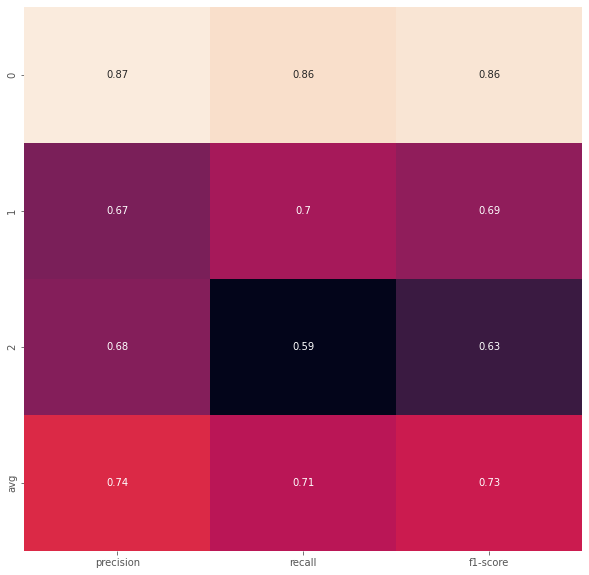

In [194]:
predicted = scores3['estimator'][scores3['test_score'].argmax()].predict(X_test)
plot_classification_report(y_test, predicted)

### RandomForestClassifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
model = RandomForestClassifier(max_depth = 1000, random_state = 1)

In [53]:
#Bootstrap Out of Bag
scores2 = cross_validate(model, X_train, y_train, cv = BootstrapOutOfBag(n_splits=5, random_seed=456), n_jobs = -1, return_estimator = True)
err2 = accuracy_score(scores2['estimator'][scores2['test_score'].argmax()].predict(X_test),y_test)

In [54]:
#Repeated K-Fold
scores3 = cross_validate(model, X_train, y_train, n_jobs = -1, cv = RepeatedKFold(n_splits = 10, n_repeats = 2), return_estimator = True)
err3 = accuracy_score(scores3['estimator'][scores3['test_score'].argmax()].predict(X_test),y_test)

In [55]:
#K-Fold
scores4 = cross_validate(model, X_train, y_train, cv = KFold(10), n_jobs=-1, return_estimator = True)
err4 = accuracy_score(scores4['estimator'][scores4['test_score'].argmax()].predict(X_test), y_test)

In [56]:
print("------- Accuracy --------")
# print(f"1. Accuracy LeaveOneOut {err1}")
print(f"2. Accuracy BootstrapOutOfBag {err2}")
print(f"3. Accuracy RepeatedKFold {err3}")
print(f"4. Accuracy KFold {err4}")

------- Accuracy --------
2. Accuracy BootstrapOutOfBag 0.7824016044121334
3. Accuracy RepeatedKFold 0.7861619453497117
4. Accuracy KFold 0.7869140135372273


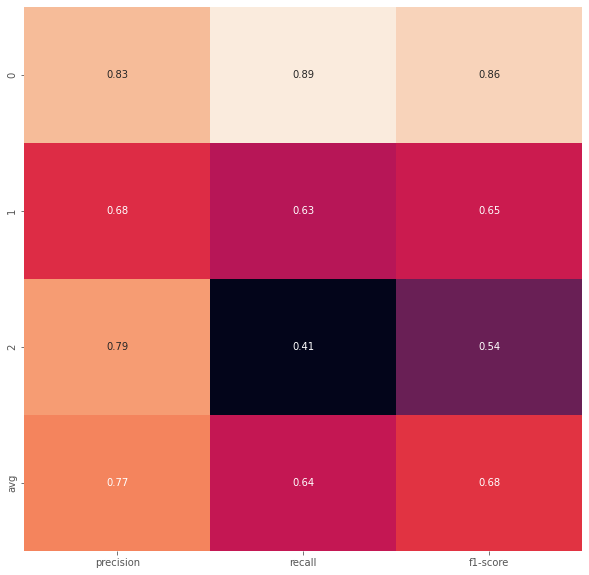

In [57]:
predicted = scores3['estimator'][scores3['test_score'].argmax()].predict(X_test)
plot_classification_report(y_test, predicted)

### RUSBoostClassifier

In [21]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

In [22]:
rusboost = RUSBoostClassifier(n_estimators=50, base_estimator = DecisionTreeClassifier(max_depth = 1000, random_state = 1), algorithm='SAMME', random_state=1)
rusboost.fit(X_train, y_train)
predicted = rusboost.predict(X_test)
print("Resampled accuracy: {:.2f}".format(accuracy_score(y_test, predicted)))
print("Resampled balanced accuracy: {:.2f}".format(balanced_accuracy_score(y_test, predicted)))

C:\Users\Patryk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Resampled accuracy: 0.69
Resampled balanced accuracy: 0.74


C:\Users\Patryk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RUSBoostClassifier was fitted with feature names
  warnings.warn(


In [23]:
rusboost = RUSBoostClassifier(n_estimators=50, base_estimator = RandomForestClassifier(max_depth = 1000, random_state = 1), algorithm='SAMME', random_state=1)
rusboost.fit(X_train, y_train)
predicted = rusboost.predict(X_test)
print("Resampled accuracy: {:.2f}".format(accuracy_score(y_test, predicted)))
print("Resampled balanced accuracy: {:.2f}".format(balanced_accuracy_score(y_test, predicted)))

C:\Users\Patryk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Patryk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RUSBoostClassifier was fitted with feature names
  warnings.warn(


Resampled accuracy: 0.68
Resampled balanced accuracy: 0.72


## Regresja

In [6]:
X_train, X_test, y_train, y_test = get_train_and_test_by_lines(df, ['Nr linii', 'Numer taborowy', 'Godzina odjazdu',
       'Godzina odjazdu przedział', 'Numeryczna Nazwa przystanku'], ["Liczba pasaz. przed"])

### DecisionTreeRegressor

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
model = DecisionTreeRegressor(max_depth = 1000, random_state = 1)

In [10]:
#LeaveOneOut CrossValidation with negative mean absolute scores: the higher the scores, the lower mean absolute errors
# scores1 = cross_validate(model, X_train, y_train, cv = LeaveOneOut(), n_jobs = -1, scoring = 'neg_mean_absolute_error', return_estimator = True)
# err1 = abs(scores1['estimator'][scores1['test_score'].argmax()].predict(X_test) - y_test)

In [13]:
#Bootstrap Out of Bag
scores2 = cross_validate(model, X_train, y_train, cv = BootstrapOutOfBag(n_splits=5, random_seed=456), n_jobs = -1, scoring = 'neg_mean_absolute_error', return_estimator = True)
err2 = abs(scores2['estimator'][scores2['test_score'].argmax()].predict(X_test) - y_test.to_numpy().reshape(1, -1))

In [31]:
#Repeated K-Fold
scores3 = cross_validate(model, X_train, y_train, n_jobs = -1, cv = RepeatedKFold(n_splits = 10, n_repeats = 10), scoring = 'neg_mean_absolute_error', return_estimator = True)
err3 = abs(scores3['estimator'][scores3['test_score'].argmax()].predict(X_test) - y_test.to_numpy().reshape(1, -1))

In [32]:
#K-Fold
scores4 = cross_validate(model, X_train, y_train, cv = KFold(10), n_jobs=-1, scoring = 'neg_mean_absolute_error',return_estimator = True)
err4 = abs(scores4['estimator'][scores4['test_score'].argmax()].predict(X_test) - y_test.to_numpy().reshape(1, -1))

In [33]:
d_err = []
d_err = pd.DataFrame({'Err':err2.reshape(-1), 'Type': 'BootOOB'})
d_err = d_err.append(pd.DataFrame({'Err':err3.reshape(-1), 'Type': 'Repeated KFold'}),ignore_index=True)
d_err = d_err.append(pd.DataFrame({'Err':err4.reshape(-1), 'Type': 'KFold'}),ignore_index=True)

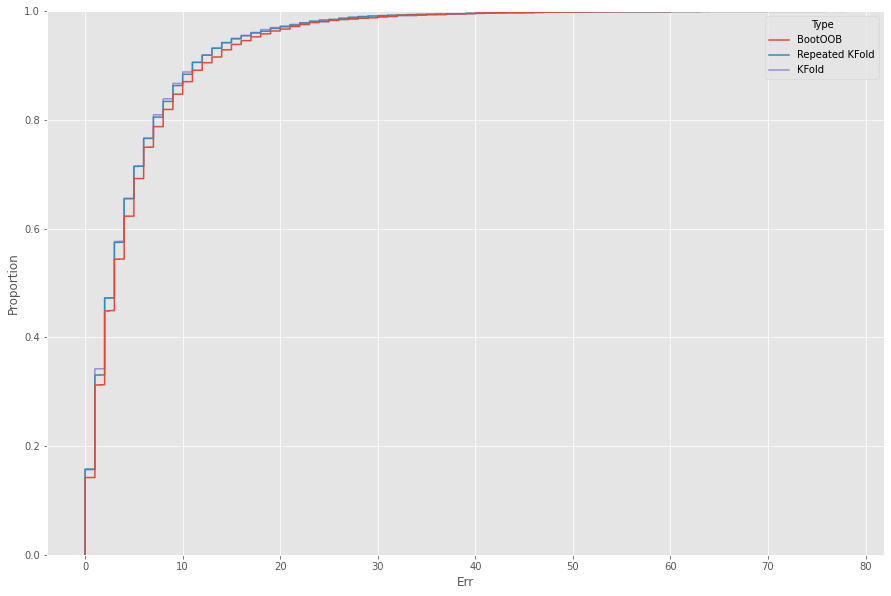

In [34]:
plt.figure(figsize = (15,10))
g = sns.ecdfplot(d_err, x = "Err", hue = 'Type')
#g.set(xlim = (0, 10))

In [35]:
stats = d_err.groupby('Type').describe().round(2)
stats

Err                                       
                 count  mean   std  min  25%  50%   75%   max
Type                                                         
BootOOB         3989.0  5.06  6.35  0.0  1.0  3.0  6.67  76.0
KFold           3989.0  4.70  6.10  0.0  1.0  3.0  6.00  70.0
Repeated KFold  3989.0  4.72  6.12  0.0  1.0  3.0  6.00  78.0

### RandomForestRegressor

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
model = RandomForestRegressor(max_depth = 1000, random_state = 1)

In [35]:
#Bootstrap Out of Bag
scores2 = cross_validate(model, X_train, y_train, cv = BootstrapOutOfBag(n_splits=5, random_seed=456), n_jobs = -1, scoring = 'neg_mean_absolute_error', return_estimator = True)
err2 = abs(scores2['estimator'][scores2['test_score'].argmax()].predict(X_test) - y_test.to_numpy().reshape(1, -1))

In [36]:
#Repeated K-Fold
scores3 = cross_validate(model, X_train, y_train, n_jobs = -1, cv = RepeatedKFold(n_splits = 10, n_repeats = 2), scoring = 'neg_mean_absolute_error', return_estimator = True)
err3 = abs(scores3['estimator'][scores3['test_score'].argmax()].predict(X_test) - y_test.to_numpy().reshape(1, -1))

In [37]:
#K-Fold
scores4 = cross_validate(model, X_train, y_train, cv = KFold(10), n_jobs=-1, scoring = 'neg_mean_absolute_error',return_estimator = True)
err4 = abs(scores4['estimator'][scores4['test_score'].argmax()].predict(X_test) - y_test.to_numpy().reshape(1, -1))

In [38]:
d_err = []
d_err = pd.DataFrame({'Err':err2.reshape(-1), 'Type': 'BootOOB'})
d_err = d_err.append(pd.DataFrame({'Err':err3.reshape(-1), 'Type': 'Repeated KFold'}),ignore_index=True)
d_err = d_err.append(pd.DataFrame({'Err':err4.reshape(-1), 'Type': 'KFold'}),ignore_index=True)

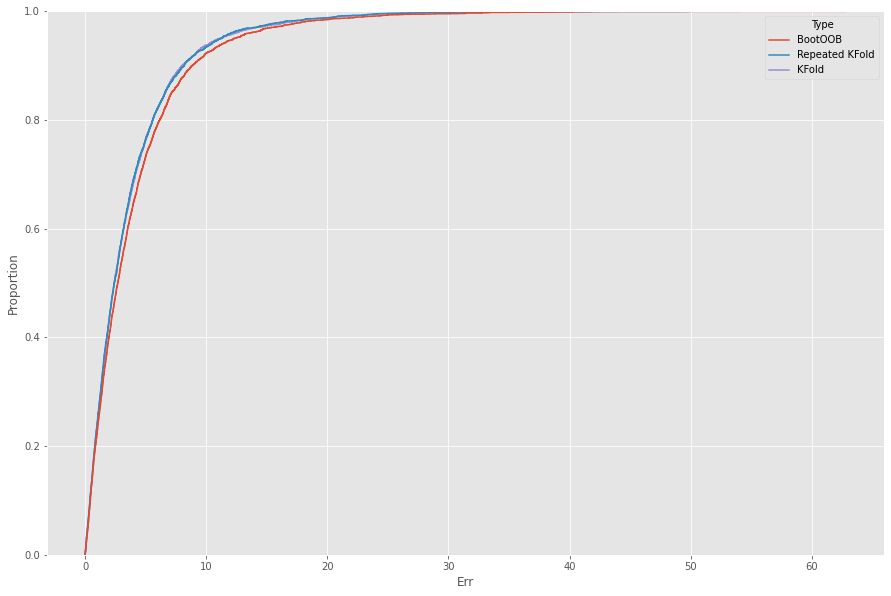

In [39]:
plt.figure(figsize = (15,10))
g = sns.ecdfplot(d_err, x = "Err", hue = 'Type')
#g.set(xlim = (0, 10))

In [40]:
stats = d_err.groupby('Type').describe().round(2)
stats

Err                                          
                 count  mean   std  min   25%   50%   75%    max
Type                                                            
BootOOB         3989.0  4.04  4.67  0.0  1.12  2.69  5.28  62.82
KFold           3989.0  3.67  4.21  0.0  1.04  2.40  4.83  54.03
Repeated KFold  3989.0  3.65  4.14  0.0  1.04  2.41  4.81  49.72